In [1]:
from __future__ import print_function
from statsmodels.compat import lzip
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns

In [2]:
df = pd.read_csv('C:\\Users\\Ufuk Altan\\Desktop\\TicketOptimization\\beef.csv')
df.head()

,Year,Quarter,Quantity,Price
0,1977,1,22.9976,142.1667
1,1977,2,22.6131,143.9333
2,1977,3,23.4054,146.5000
3,1977,4,22.7401,150.8000
4,1978,1,22.0441,160.0000


In [3]:
model = ols("Quantity ~ Price", data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Quantity   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     811.2
Date:                Tue, 11 Aug 2020   Prob (F-statistic):           1.69e-46
Time:                        22:58:32   Log-Likelihood:                -77.493
No. Observations:                  91   AIC:                             159.0
Df Residuals:                      89   BIC:                             164.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.0515      0.413     72.701      0.0

In [100]:
np.exp(2), np.exp(2.34), np.exp(3.23)

(7.38905609893065, 10.381236562731843, 25.279656970962893)

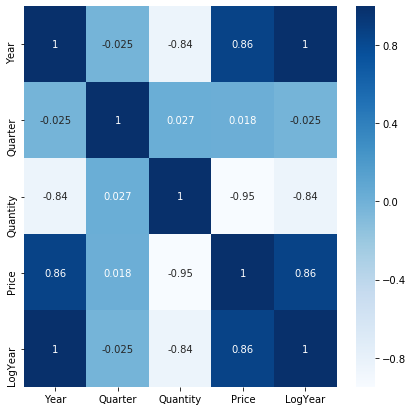

In [35]:
plt.figure(figsize=(7,7))
sns.heatmap(df.corr(), annot=True, cmap ='Blues')

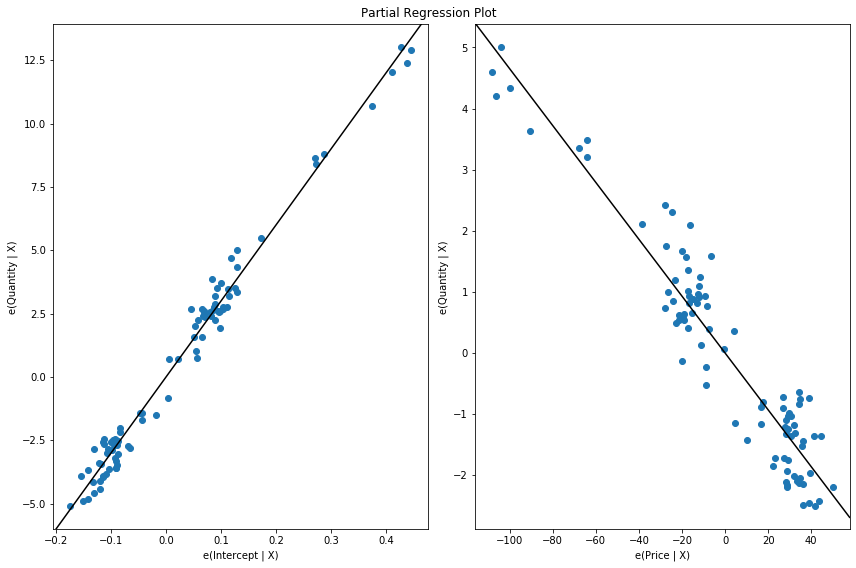

In [18]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(model, fig=fig)

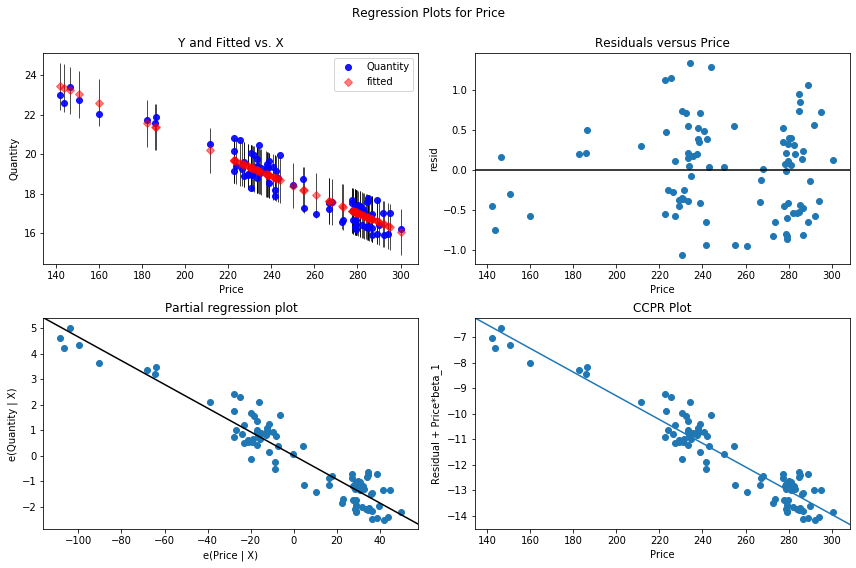

In [19]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'Price', fig=fig)

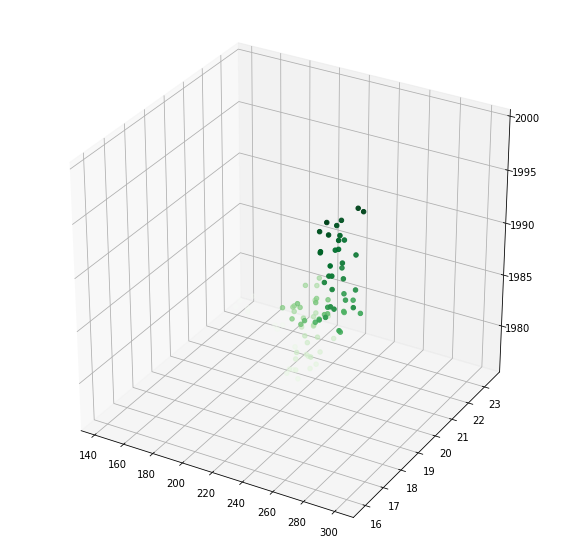

In [27]:
from mpl_toolkits import mplot3d
plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.scatter3D(df['Price'], df['Quantity'], df['Year'], c= df['Year'], cmap ='Greens')

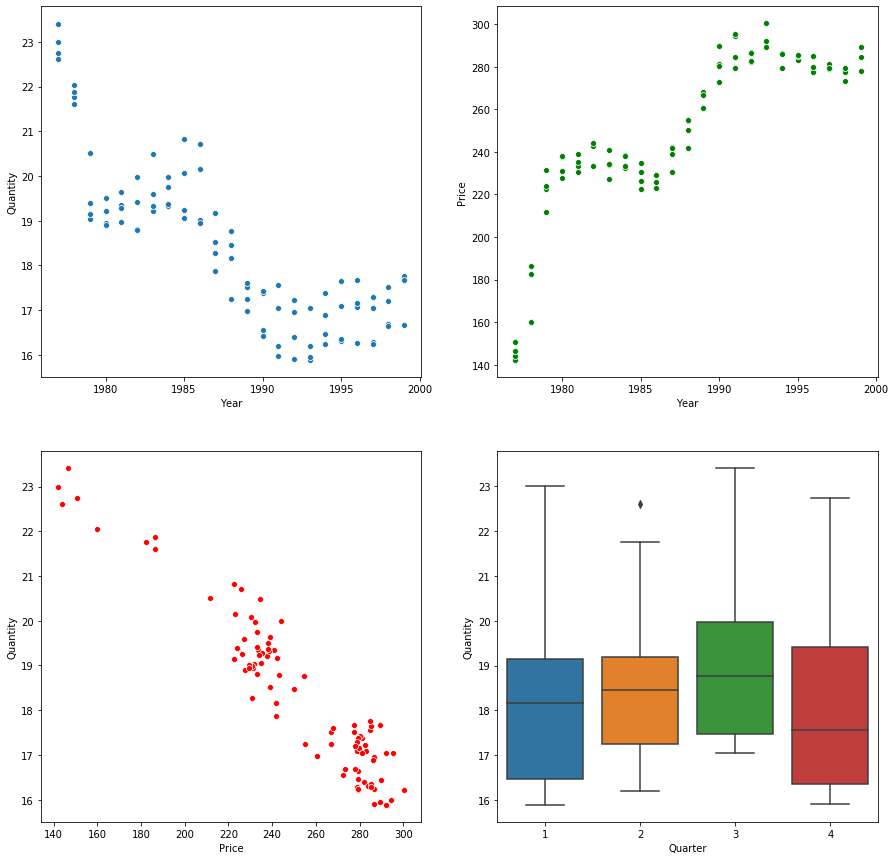

In [30]:
plt.figure(figsize=(15,15))

plt.subplot(2,2,1)
sns.scatterplot(data=df, x = 'Year', y = 'Quantity')

plt.subplot(2,2,2)
sns.scatterplot(data=df, x = 'Year', y = 'Price', color = 'g')

plt.subplot(2,2,3)
sns.scatterplot(data=df, x = 'Price', y = 'Quantity', color = 'r')

plt.subplot(2,2,4)
sns.boxplot(data=df, x = 'Quarter', y = 'Quantity')


In [60]:
df['Revenue'] = df['Price']*df['Quantity']

In [61]:
df.columns

Index(['Year', 'Quarter', 'Quantity', 'Price', 'Revenue'], dtype='object')

In [62]:
cols = ['Year', 'Quarter',  'Price', 'Revenue']

In [63]:
df = df[cols]

In [64]:
df.dtypes

Year         int64
Quarter      int64
Price      float64
Revenue    float64
dtype: object

In [3]:
df = df.astype({"Quarter": str})

In [82]:
df_dummies = pd.get_dummies(df, drop_first=True)

In [47]:
df_dummies.describe()

,Year,Quantity,Price,Quarter_2,Quarter_3,Quarter_4
count,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000
mean,1987.879121,18.403309,250.440293,0.252747,0.252747,0.241758
std,6.604435,1.813343,37.010231,0.436995,0.436995,0.430521
min,1977.000000,15.891500,142.166700,0.000000,0.000000,0.000000
25%,1982.000000,17.043950,231.333350,0.000000,0.000000,0.000000
50%,1988.000000,18.167800,250.100000,0.000000,0.000000,0.000000
75%,1993.500000,19.358650,280.716700,0.500000,0.500000,0.000000
max,1999.000000,23.405400,300.400000,1.000000,1.000000,1.000000


In [48]:
df_dummies.corr()

,Year,Quantity,Price,Quarter_2,Quarter_3,Quarter_4
Year,1.000000,-0.837540,0.858335,0.010703,0.010703,-0.032593
Quantity,-0.837540,1.000000,-0.949283,0.024760,0.153170,-0.088739
Price,0.858335,-0.949283,1.000000,0.027187,0.018737,-0.006197
Quarter_2,0.010703,0.024760,0.027187,1.000000,-0.338235,-0.328395
Quarter_3,0.010703,0.153170,0.018737,-0.338235,1.000000,-0.328395
Quarter_4,-0.032593,-0.088739,-0.006197,-0.328395,-0.328395,1.000000


In [50]:
X = df_dummies.drop('Revenue', axis =1)
y = df_dummies['Revenue']

In [94]:
#DENEME
X = df_dummies.drop(['Quantity','Year'], axis =1)
y = df_dummies['Quantity']

In [83]:
#DENEME
X = df_dummies.drop(['Quantity','Price'], axis =1)
y = df_dummies['Price']

In [95]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2 )

In [96]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [54]:
from sklearn.cross_decomposition import PLSRegression
pls = PLSRegression(n_components=1)
pls.fit(X_train, y_train)
y_pred = pls.predict(X_test)

In [97]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'linear')
regressor.fit(X_train,y_train)

SVR(kernel='linear')

In [98]:
y_pred = regressor.predict(X_test)

In [74]:
def percentage_error(dataframe,pred, true_value):
    
    '''
    dataframe: Pass in pandas dataframe variable
    pred = dataframe['Predictions'] #model.predict(x_test).reshape()
    true_value = dataframe['True Values'] #y_test
    
    '''
    
    difference = dataframe[true_value] - dataframe[pred]
    
    dataframe['Error(%)']= np.absolute(difference/dataframe[true_value]*100)
    
    print('median \t {}'.format(dataframe['Error(%)'].median()))    
    print(dataframe['Error(%)'].describe())
    
def adjusted_r_squared(r2, data):
    
    x = (1-r2)*(data.shape[0]-1)/(data.shape[0]-data.shape[1]-1) 
    
    return 1-x

In [14]:
y_test.shape, y_pred.shape

((19,), (19,))

In [99]:
y_test = np.array(y_test)
y_pred = np.reshape(y_pred, (19,))

In [100]:
test = pd.DataFrame()
test['TrueValues'] = y_test
test['Predictions'] = y_pred

In [101]:
percentage_error(test, 'Predictions', 'TrueValues')

median 	 2.793813379684711
count    19.000000
mean      2.384676
std       1.410567
min       0.073071
25%       1.085383
50%       2.793813
75%       3.478436
max       4.498426
Name: Error(%), dtype: float64


<AxesSubplot:xlabel='Error(%)'>

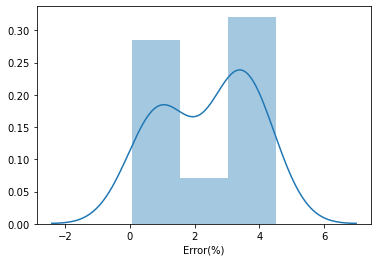

In [102]:
sns.distplot(test['Error(%)'])

In [103]:
from sklearn.metrics import mean_absolute_error, r2_score, median_absolute_error, explained_variance_score
mean_absolute_error(y_test, y_pred), median_absolute_error(y_test, y_pred)

(0.4569563452223387, 0.5324185870397073)

In [104]:
r2_score(y_test, y_pred), adjusted_r_squared(r2_score(y_test, y_pred), df_dummies),explained_variance_score(y_test, y_pred)

(0.9213971764839356, 0.915782689089931, 0.9263115489565898)

In [80]:
test

,TrueValues,Predictions,Error(%)
0,3428.891100,3912.001672,14.089411
1,4299.295000,4289.184677,0.235162
2,4886.215560,4747.138822,2.846308
3,4429.710060,4484.790121,1.243424
4,4856.274867,4960.716078,2.150645
5,4637.916360,4463.887151,3.752315
6,4617.821390,4557.655125,1.302915
7,4321.169763,4397.834303,1.774162
8,4525.636560,4658.201795,2.929206
9,5110.434254,5037.747779,1.422315


In [146]:
data = [1977, 142.166, 0,0,0]

In [149]:
def create_prediction(data):
    
    """
    Enter list with 21 columns
    """
    
    data = np.array(data)
    data = np.reshape(data, (1,5))
    data = sc.transform(data)
    
    prediction = pls.predict(data)[0][0]

    
    return prediction

In [150]:
create_prediction(data)

3770.3878808311892

In [151]:
y.head()

0    3269.492900
1    3254.778106
2    3428.891100
3    3429.207080
4    3527.056000
Name: Revenue, dtype: float64

In [153]:
dif = 3269.492900 - 3770.3878808311892
error=np.absolute(dif/3269.492900*100)
error

15.320265134424641

In [154]:
pls.coef_

array([[131.46442425],
       [176.99474638],
       [ 21.18111158],
       [ 51.65224635],
       [-22.11738311]])

In [155]:
df_dummies.columns

Index(['Year', 'Price', 'Revenue', 'Quarter_2', 'Quarter_3', 'Quarter_4'], dtype='object')

In [157]:
weights = pd.DataFrame()
weights['Features'] = ['Year', 'Price', 'Quarter_2', 'Quarter_3',
       'Quarter_4']
weights['Weights'] = pls.coef_
weights

,Features,Weights
0,Year,131.464424
1,Price,176.994746
2,Quarter_2,21.181112
3,Quarter_3,51.652246
4,Quarter_4,-22.117383


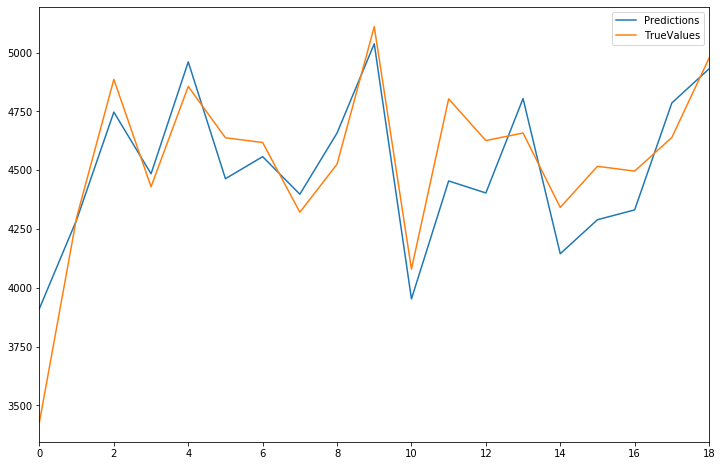

In [159]:
test[['Predictions', 'TrueValues']].plot(figsize=(12,8))

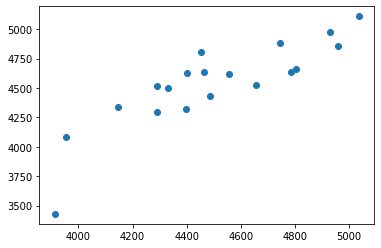

In [160]:
plt.scatter(test['Predictions'], test['TrueValues'])

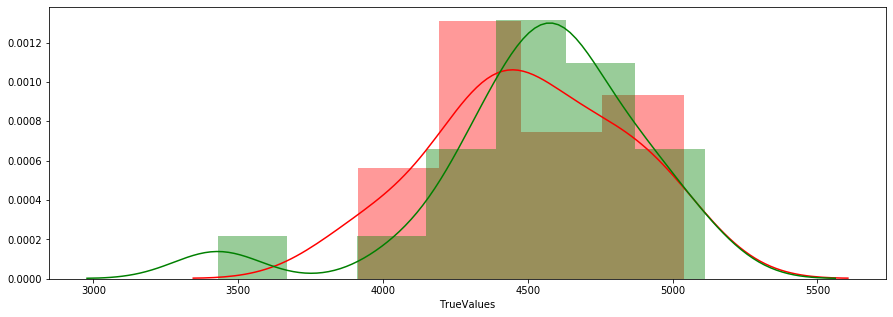

In [161]:
plt.figure(figsize=(15,5))
sns.distplot(test['Predictions'], color='r')
sns.distplot(test['TrueValues'], color='g')

In [168]:
price = [150, 190, 200, 250, 390]
predictions = []

for i in price:
    new_data = [2020, i, 0,1,0]
    pred = create_prediction(new_data)
    predictions.append(pred)

predictions

[4787.795012723674,
 4980.118918213808,
 5028.1998945863415,
 5268.6047764490095,
 5941.7384456644795]

In [103]:
data_dict = {"FromTo":'MADRID-BARCELONA',
             "TrainType": 'AVE',
             "TrainClass": 'Turista Plus',
             "Fare":'Promo',
             "DepartureHour":'07',
             "DepartureMonth":'04' }



In [101]:
import requests

In [106]:
result = requests.post("http://localhost:5000/api/ticketprice", json = data_dict)

In [107]:
result.status_code

500